In [49]:
from agents import *
import random # random module for generating random games
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams # you need to alter rcParams after magic command "%matplotlib inline"
rcParams['figure.figsize'] = (18,9) # set default figure size
rcParams['figure.facecolor'] = 'w'
from typing import List, Tuple
import pandas as pd

In [30]:
def train_in_varied_environment(alt_train_opponent: str, start_percent: int = 0, trials: int = 1) -> Tuple[List]:
    percent_optimal_agents = [] # each entry is an x axis
    games_until_convergence = [] # each entry is an y axis

    for trial in range(trials):
        percent_optimal_agents.append([])
        games_until_convergence.append([])

        for percent_optimal in range(start_percent, 101):
            Qagent = QLearningAgent("Q Learning Agents/Varied Education Level", 'OptimalAgent', 3, 5, 0.4, 1, 0.05, True)

            # make new entry
            percent_optimal_agents[-1].append(percent_optimal)
            games_until_convergence[-1].append(0)
            while True:
                # see if converged
                if games_until_convergence[-1][-1] % 50 == 0:
                    # only test every 50 games otherwise very slow (minimum is a couple hundred when optimal == 100)
                    if Qagent.test_accuracy(200) >= 0.995:
                        break

                # find random opponent to train with
                if random.randint(1, 100) <= percent_optimal:
                    Qagent.set_train_opponent("OptimalAgent")
                else:
                    Qagent.set_train_opponent(alt_train_opponent)

                # train
                Qagent.train(1, 1000) # saving is slow, so we don't save (make parameters: game > train_games)
                games_until_convergence[-1][-1] += 1

    avg_games_until_convergence = [sum([games_until_convergence[j][i] for j in range(trials)])/trials for i in range(len(percent_optimal_agents[0]))]

    return percent_optimal_agents, games_until_convergence, avg_games_until_convergence

In [31]:
# Vary percentage of optimal agents in environment from 0, 1, 2 ... 100 (all others are random agents). The Q-learning agent trains by picking a random agent in the environment as its opponent for each game. See when QLearningAgent converges (99.5% accuracy).
# run 3 times due to variability

percent_optimal_agents_random, games_until_convergence_random, avg_games_until_convergence_random = train_in_varied_environment("RandomAgent")

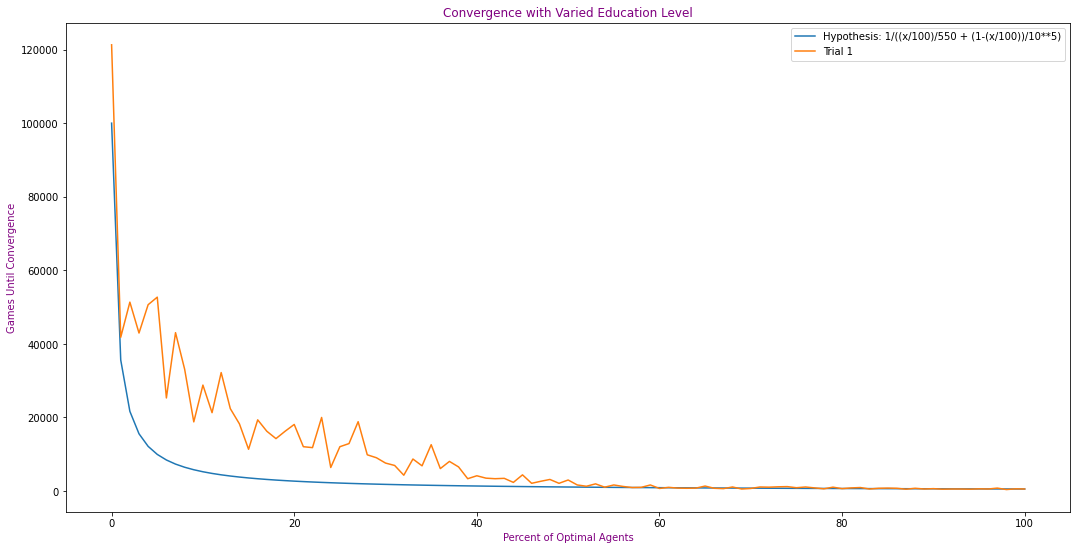

In [32]:
# Initial data visualization

# axis labels and title
plt.xlabel("Percent of Optimal Agents", color='purple')
plt.ylabel("Games Until Convergence", color='purple')
plt.title("Convergence with Varied Education Level", color='purple')

# Hypothesis:
# When 0% are optimal, converges at 10**5 games. When 100% are optimal, converges at 550 games.
# Thus, we can assume a game with the random agent gets us 1/10**5 of the way to convergence.
# Similarly, a game with the optimal agent gets us 1/550 of the way to convergence.
# Then, if x is the probability of facing an optimal agent, the expected value of amount to convergence per game is (x/550 + (1-x)/10**5)
# Therefore, we expect to take 1/(x/550 + (1-x)/10**5) games to converge

hypothesis_x_random = list(range(101))
hypothesis_y_random = [1/((x/100)/550 + (1-(x/100))/10**5) for x in hypothesis_x_random]
plt.plot(hypothesis_x_random, hypothesis_y_random, label = 'Hypothesis: 1/((x/100)/550 + (1-(x/100))/10**5)')

# actual trial data
for trial in range(len(games_until_convergence_random)):
    plt.plot(percent_optimal_agents_random[trial], games_until_convergence_random[trial], label = "Trial " + str(trial+1))
plt.legend(loc="upper right");

Percent of Actual Games Underestimated by Hypothesis: 79.20792079207921


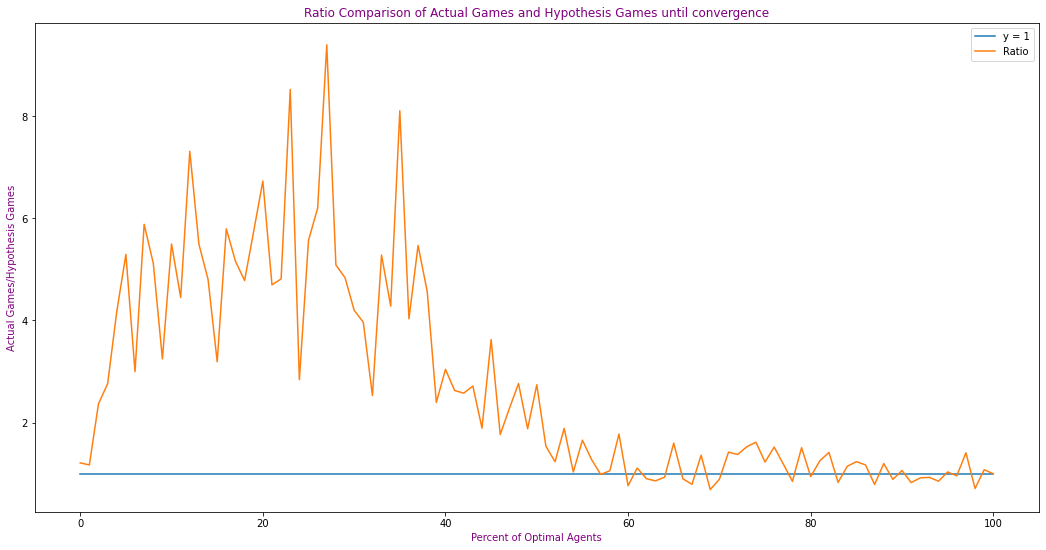

In [33]:
# Further comparison of hypothesis games and actual games until convergence (ratio) with visualization

above = []
fraction_actual_games_random = []
for percent_optimal in range(101):
    average_games = avg_games_until_convergence_random[percent_optimal]
    hypothesis_games = hypothesis_y_random[percent_optimal]

    above.append(hypothesis_games < average_games)
    fraction_actual_games_random.append(average_games/hypothesis_games)

# display results of analysis
print("Percent of Actual Games Underestimated by Hypothesis:", 100*sum(above)/101)
# axis labels and title
plt.xlabel("Percent of Optimal Agents", color='purple')
plt.ylabel("Actual Games/Hypothesis Games", color='purple')
plt.title("Ratio Comparison of Actual Games and Hypothesis Games until convergence", color='purple')

# ratios
plt.plot(hypothesis_x_random, [1]*101, label="y = 1")
plt.plot(hypothesis_x_random, fraction_actual_games_random, label="Ratio")
plt.legend();

In [34]:
# Same training as above but now instead of RandomAgent, we use the ReverseOptimalAgent
# Note that the 0 data point is not used because the Q-learning agent fails to converge!
# The Q table converges on the wrong values! -> 0.27 accuracy after 1e6 games
# (4,) -> (0, 1) Q table believes that removing 1 element from the heap is always optimal
# (3) -> (2) -> 2 -> 0

percent_optimal_agents_revop, games_until_convergence_revop, avg_games_until_convergence_revop = train_in_varied_environment("ReverseOptimalAgent", 1)

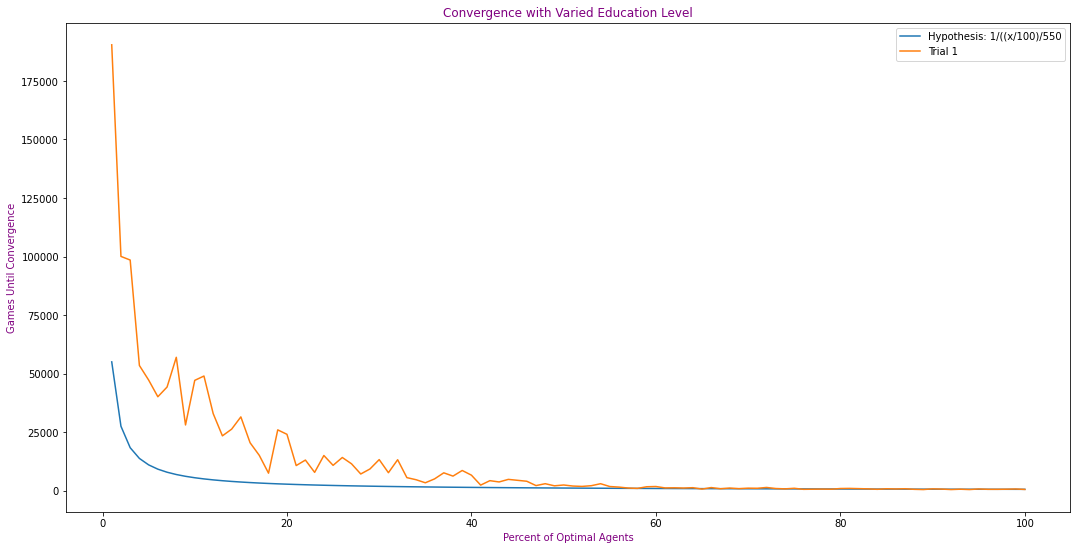

In [35]:
# Initial data visualization

# axis labels and title
plt.xlabel("Percent of Optimal Agents", color='purple')
plt.ylabel("Games Until Convergence", color='purple')
plt.title("Convergence with Varied Education Level", color='purple')

# Hypothesis
# In denominator of hypothesized games: the contribution from playing with ReverseOptimal Agent is
# (1-x)/infinity = 0 since it does not converge
hypothesis_x_revop = list(range(1, 101))
hypothesis_y_revop = [1/((x/100)/550) for x in hypothesis_x_revop]
plt.plot(hypothesis_x_revop, hypothesis_y_revop, label = 'Hypothesis: 1/((x/100)/550')

# actual trial data
for trial in range(len(games_until_convergence_revop)):
    plt.plot(percent_optimal_agents_revop[trial], games_until_convergence_revop[trial], label = "Trial " + str(trial+1))
plt.legend(loc="upper right");

Percent of Actual Games Underestimated by Hypothesis: 86.0


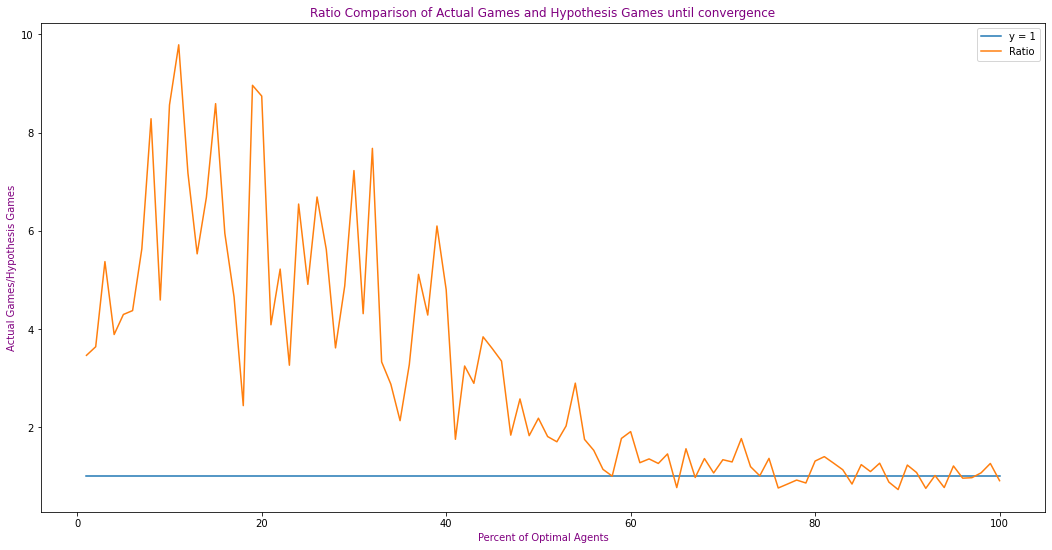

In [36]:
# Further comparison of hypothesis games and actual games until convergence (ratio) with visualization

above = []
fraction_actual_games_revop = []
for percent_optimal in range(100):
    average_games = avg_games_until_convergence_revop[percent_optimal]
    hypothesis_games = hypothesis_y_revop[percent_optimal]

    above.append(hypothesis_games < average_games)
    fraction_actual_games_revop.append(average_games/hypothesis_games)

# display results of analysis
print("Percent of Actual Games Underestimated by Hypothesis:", 100*sum(above)/100)
# axis labels and title
plt.xlabel("Percent of Optimal Agents", color='purple')
plt.ylabel("Actual Games/Hypothesis Games", color='purple')
plt.title("Ratio Comparison of Actual Games and Hypothesis Games until convergence", color='purple')

# ratios
plt.plot(hypothesis_x_revop, [1]*100, label="y = 1")
plt.plot(hypothesis_x_revop, fraction_actual_games_revop, label="Ratio")
plt.legend();

In [38]:
# Same training as above but now instead of ReverseOptimalAgent, we use RandomReverseOptimalAgent

percent_optimal_agents_ranrevop, games_until_convergence_ranrevop, avg_games_until_convergence_ranrevop = train_in_varied_environment("RandomReverseOptimalAgent", 1)

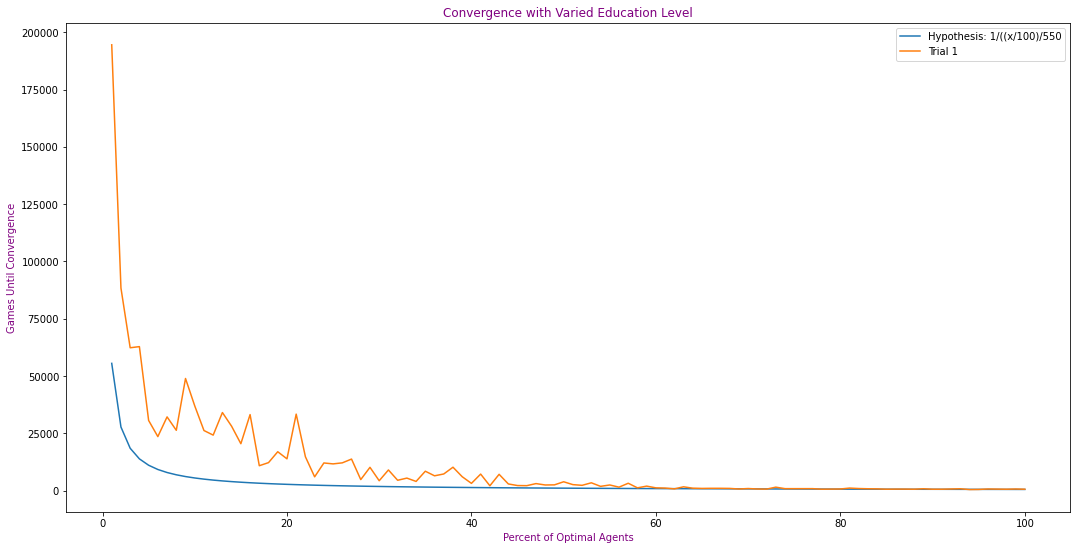

In [40]:
# Initial data visualization

# axis labels and title
plt.xlabel("Percent of Optimal Agents", color='purple')
plt.ylabel("Games Until Convergence", color='purple')
plt.title("Convergence with Varied Education Level", color='purple')

# Hypothesis
# In denominator of hypothesized games: the contribution from playing with ReverseOptimal Agent is
# (1-x)/infinity = 0 since it does not converge
hypothesis_x_ranrevop = list(range(1, 101))
hypothesis_y_ranrevop = [1/((x/101)/550) for x in hypothesis_x_ranrevop]
plt.plot(hypothesis_x_ranrevop, hypothesis_y_ranrevop, label = 'Hypothesis: 1/((x/100)/550')

# actual trial data
for trial in range(len(percent_optimal_agents_ranrevop)):
    plt.plot(percent_optimal_agents_ranrevop[trial], games_until_convergence_ranrevop[trial], label = "Trial " + str(trial+1))
plt.legend(loc="upper right");

Percent of Actual Games Underestimated by Hypothesis: 91.0


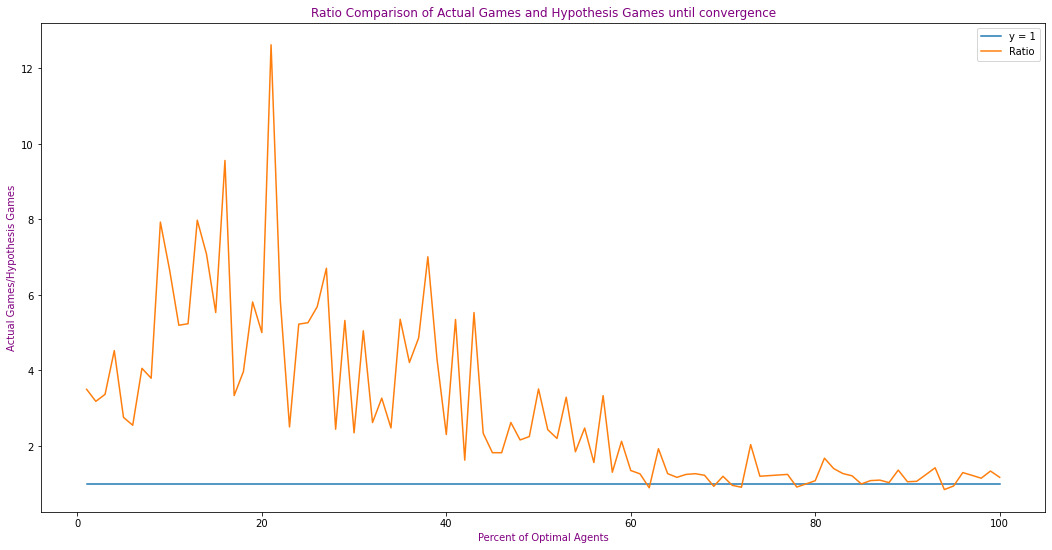

In [42]:
# Further comparison of hypothesis games and actual games until convergence (ratio) with visualization

above = []
fraction_actual_games_ranrevop = []
for percent_optimal in range(100):
    average_games = avg_games_until_convergence_ranrevop[percent_optimal]
    hypothesis_games = hypothesis_y_ranrevop[percent_optimal]

    above.append(hypothesis_games < average_games)
    fraction_actual_games_ranrevop.append(average_games/hypothesis_games)

# display results of analysis
print("Percent of Actual Games Underestimated by Hypothesis:", 100*sum(above)/100)
# axis labels and title
plt.xlabel("Percent of Optimal Agents", color='purple')
plt.ylabel("Actual Games/Hypothesis Games", color='purple')
plt.title("Ratio Comparison of Actual Games and Hypothesis Games until convergence", color='purple')

# ratio
plt.plot(hypothesis_x_ranrevop, [1]*100, label="y = 1")
plt.plot(hypothesis_x_ranrevop, fraction_actual_games_ranrevop, label="Ratio")
plt.legend();

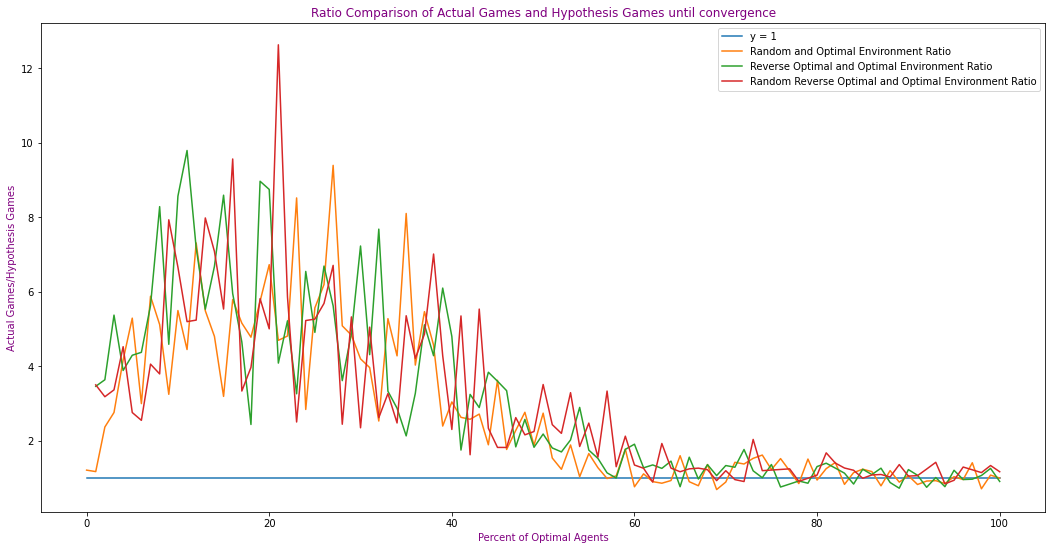

In [43]:
# Further comparison of hypothesis games and actual games until convergence (ratio) with visualization
# Plotting all comparisions now

# axis labels and title
plt.xlabel("Percent of Optimal Agents", color='purple')
plt.ylabel("Actual Games/Hypothesis Games", color='purple')
plt.title("Ratio Comparison of Actual Games and Hypothesis Games until convergence", color='purple')

# ratios
plt.plot(hypothesis_x_random, [1]*101, label="y = 1")
plt.plot(hypothesis_x_random, fraction_actual_games_random, label="Random and Optimal Environment Ratio")
plt.plot(hypothesis_x_revop, fraction_actual_games_revop, label="Reverse Optimal and Optimal Environment Ratio")
plt.plot(hypothesis_x_ranrevop, fraction_actual_games_ranrevop, label="Random Reverse Optimal and Optimal Environment Ratio")
plt.legend();

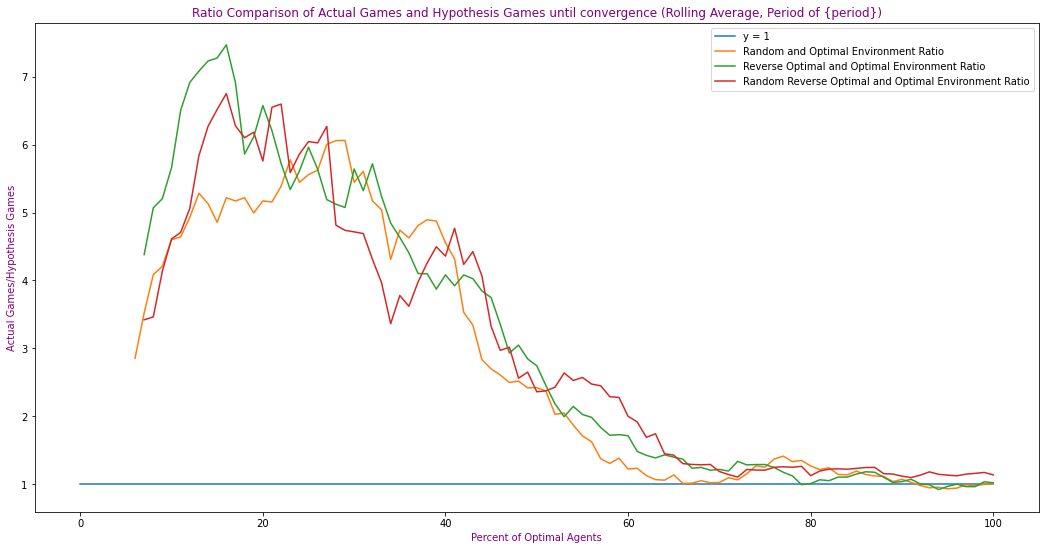

In [59]:
# Same as above plot but now with moving average
# Further comparison of hypothesis games and actual games until convergence (ratio) with visualization.
# Plotting all comparisions now
period = 7

# axis labels and title
plt.xlabel("Percent of Optimal Agents", color='purple')
plt.ylabel("Actual Games/Hypothesis Games", color='purple')
plt.title("Ratio Comparison of Actual Games and Hypothesis Games until convergence (Rolling Average, Period of {period})", color='purple')

# ratios
plt.plot(hypothesis_x_random, [1]*101, label="y = 1")
plt.plot(hypothesis_x_random, pd.DataFrame(fraction_actual_games_random).rolling(period).mean(), label="Random and Optimal Environment Ratio")
plt.plot(hypothesis_x_revop, pd.DataFrame(fraction_actual_games_revop).rolling(period).mean(), label="Reverse Optimal and Optimal Environment Ratio")
plt.plot(hypothesis_x_ranrevop, pd.DataFrame(fraction_actual_games_ranrevop).rolling(period).mean(), label="Random Reverse Optimal and Optimal Environment Ratio")
plt.legend();